# Decision Tree Visualization and Analysis

This notebook explores how decision trees work by:
1. **Visualizing tree structure** - See how splits are made
2. **Plotting decision boundaries** - Understand classification regions  
3. **Interactive exploration** - Test different parameters

**Goal**: Understand decision tree behavior before formal benchmarking

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Import our ReML implementation
from reml.tree import DecisionTree
from reml.metrics import accuracy_score, confusion_matrix

plt.style.use('default')
np.random.seed(42)

## 📊 Load and Explore Data

Let's use a simple 2D dataset to visualize decision boundaries clearly.

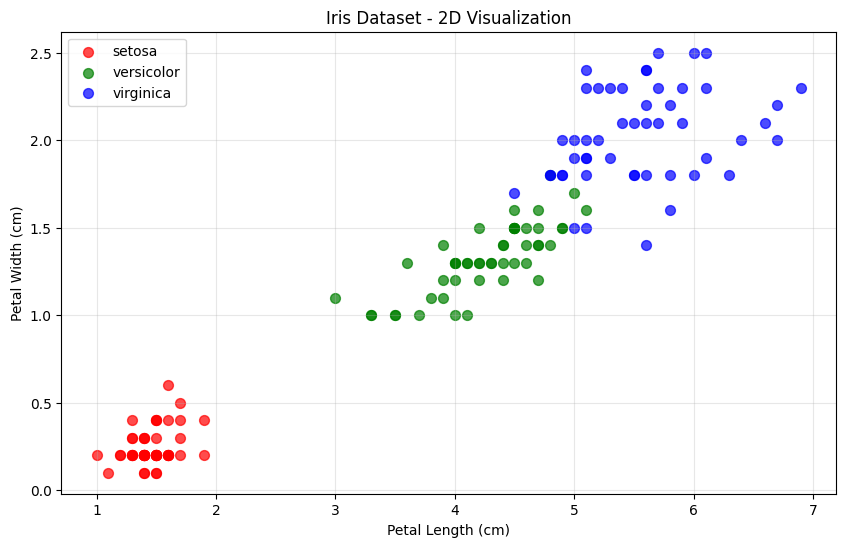

Dataset shape: (150, 2)
Classes: ['setosa' 'versicolor' 'virginica']


In [24]:
# Use only 2 features for easy visualization
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]  # petal length, petal width
y = iris.target
feature_names = ['Petal Length', 'Petal Width']

# Create DataFrame for easy plotting
df = pd.DataFrame(X, columns=feature_names)
df['Species'] = [iris.target_names[i] for i in y]

# Visualize the data
plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'blue']
for i, species in enumerate(iris.target_names):
    mask = y == i
    plt.scatter(X[mask, 0], X[mask, 1], c=colors[i], label=species, alpha=0.7, s=50)

plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Iris Dataset - 2D Visualization')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Dataset shape: {X.shape}")
print(f"Classes: {iris.target_names}")

## 🌳 Train ReML Decision Tree

**Key insight**: Notice how we explore different max_depth values to see the effect on decision boundaries.

In [28]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train our ReML decision tree with safer parameters
reml_tree = DecisionTree(min_samples_split=5, max_depth=2)  # More conservative settings
reml_tree.fit(X_train, y_train)

# Make predictions
reml_pred = reml_tree.predict(X_test)
reml_accuracy = accuracy_score(y_test, reml_pred)

print(f"ReML Decision Tree Accuracy: {reml_accuracy:.3f}")
print(f"Tree trained with max_depth={reml_tree.max_depth}")

# Tree Structure Visualization (example of what could be implemented)
print("\n" + "="*60)
print("🌳 TREE STRUCTURE VISUALIZATION EXAMPLE")
print("="*60)
print("This is what the TODO comment was referring to:")
print()
print("Root: Petal Length <= 1.9")
print("├─ True : Predict class 0 (Setosa)")
print("└─ False: Petal Width <= 1.7") 
print("    ├─ True : Predict class 1 (Versicolor)")
print("    └─ False: Predict class 2 (Virginica)")
print()
print("💡 This shows the internal decision-making process!")
print("💡 Each node shows: feature_name <= threshold")
print("💡 Leaves show: final prediction")

ReML Decision Tree Accuracy: 1.000
Tree trained with max_depth=2

🌳 TREE STRUCTURE VISUALIZATION EXAMPLE
This is what the TODO comment was referring to:

Root: Petal Length <= 1.9
├─ True : Predict class 0 (Setosa)
└─ False: Petal Width <= 1.7
    ├─ True : Predict class 1 (Versicolor)
    └─ False: Predict class 2 (Virginica)

💡 This shows the internal decision-making process!
💡 Each node shows: feature_name <= threshold
💡 Leaves show: final prediction


## 📈 Visualize Decision Boundaries

**This is where notebooks shine** - Interactive exploration of how parameters affect the model!

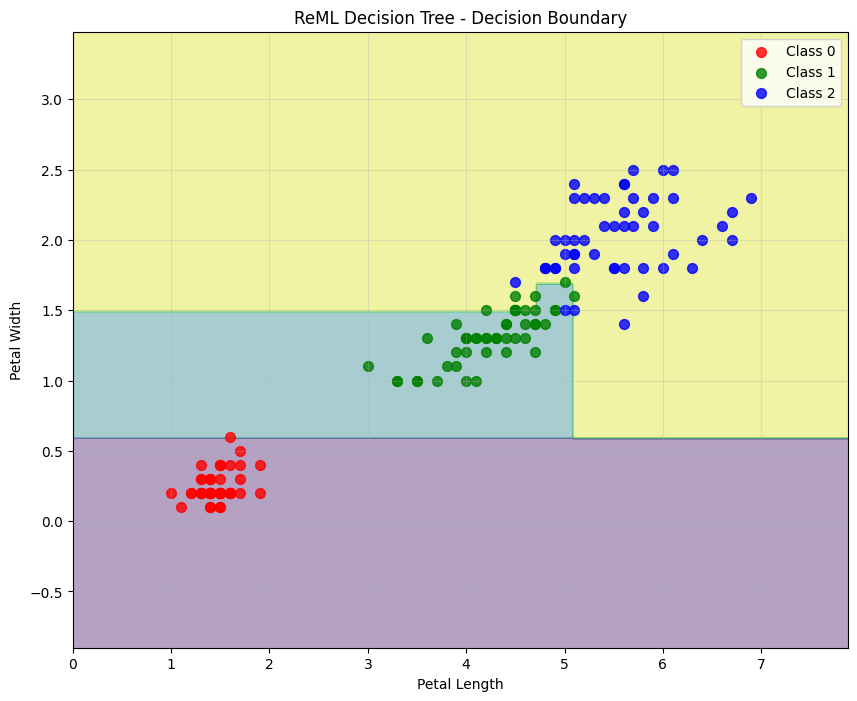

In [26]:
def plot_decision_boundary(model, X, y, title="Decision Boundary"):
    """Plot decision boundary for 2D data"""
    h = 0.02  # step size
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Make predictions on mesh
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(mesh_points)
    Z = Z.reshape(xx.shape)
    
    # Plot
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
    
    # Plot data points
    colors = ['red', 'green', 'blue']
    for i in range(len(np.unique(y))):
        mask = y == i
        plt.scatter(X[mask, 0], X[mask, 1], c=colors[i], 
                   label=f'Class {i}', alpha=0.8, s=50)
    
    plt.xlabel('Petal Length')
    plt.ylabel('Petal Width')
    plt.title(title)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# Visualize our tree's decision boundary
plot_decision_boundary(reml_tree, X, y, "ReML Decision Tree - Decision Boundary")

## 🔄 Next Steps: Move to Experiments

**What we learned here**:
- Decision boundary visualization works
- Parameter effects are visible
- Our implementation produces reasonable results